# Cleaning up the NBA Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [142]:
# stat columns used in the weekly matchups in a NBA fantasy league
stats = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [143]:
# read per game data of NBA players from 1947 to present
df = pd.read_csv('../stats-csv/nba-per-game-stats.csv', header = 0)

In [144]:
# renaming columns
df.rename(columns={'mp_per_game': 'MP',
                   'fg_per_game': 'FGM',
                   'fga_per_game': 'FGA',
                   'x3p_per_game': 'FG3M',
                   'x3pa_per_game': 'FG3A',
                   'ft_per_game': 'FTM',
                   'fta_per_game': 'FTA',
                   'orb_per_game': 'OREB',
                   'drb_per_game': 'DREB',
                   'ast_per_game': 'AST',
                   'stl_per_game': 'STL',
                   'blk_per_game': 'BLK',
                   'tov_per_game': 'TOV',
                   'pf_per_game': 'PF',
                   'pts_per_game': 'PTS'}, inplace=True)

# remove unnecessary columns
df = df.drop(['trb_per_game', 'x2pa_per_game', 'x2p_per_game'], axis=1)

In [149]:
# drop rows where all values are NaN
cleaned_df = df.dropna(axis=0, how='all')

<AxesSubplot:>

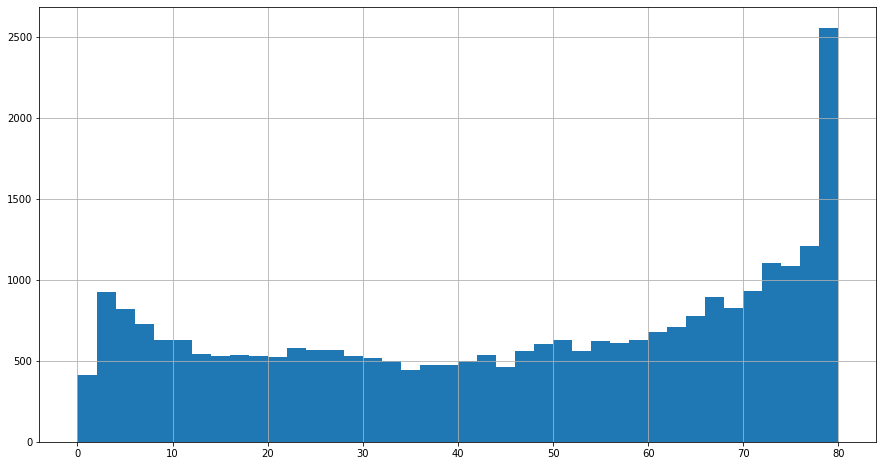

In [150]:
# removing outliers in the data
# histogram of games played in the dataframe
bin_vals = np.arange(start = 0, stop=82, step=2)
cleaned_df['g'].hist(bins=bin_vals, figsize=[15, 8])

In [151]:
# by observing the histogram, we can see the data set gets more normal after 10 games
# so all seasons for players that played in less than 10 games will be removed from the dataframe
min_games = 10
filtered_df = cleaned_df[cleaned_df['g'] > min_games]

In [152]:
a = cleaned_df['player_id'].count()
b = filtered_df['player_id'].count()

In [153]:
a - b
# 3827 rows have been removed

3827

# Normalising Data Across NBA Seasons
A 20 points per game player in 1995 is not equivalent to a 20 points per game player in 2023. The playstyle, pace and rules of the NBA have drastically changed over the years. More specifically, the pace of the game has increased, with the average points per game of each season increasing consistently alongside the league's evolution. A key contributor to this is the increased volume in three point shooting, which allows a modern NBA player to more easily average 20 points per game compared to a NBA player from the past. Normalising the stats across NBA seasons will allow for better comparison between players' seasons across multiple decades.

In [154]:
latest_season = (filtered_df['season'] == 2023)

In [155]:
df_2023 = filtered_df[latest_season]

In [156]:
# function to normalise each stat column
def normalise(column):
    return (column - column.min()) / (column.max() - column.min())

In [157]:
stats_to_norm = ['PTS', 'MP', 'FGM', 'FGA', 'FG3M', 'FG3A', 'FTM', 'FTA', 'OREB', 'DREB', 'AST', 'STL', 'TOV', 'BLK', 'PF']

In [158]:
# function to normalise the dataframe using the function above
def normalise_df(df):
    for stat in stats_to_norm:
        df['NORM_{}'.format(stat)] = normalise(df[stat])
    return df

In [159]:
normed_2023 = normalise_df(df_2023)

/home/nathhuynh/nba-fantasy/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [160]:
normed_2023.sample(5)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
574,31032,2023,4882,Saddiq Bey,NaN,SF,23.0,3,NBA,TOT,...,0.473684,0.27,0.252033,0.254902,0.340426,0.132075,0.444444,0.200,0.066667,0.405405
142,30600,2023,3812,Derrick Rose,NaN,PG,34.0,14,NBA,NYK,...,0.201754,0.04,0.032520,0.058824,0.106383,0.150943,0.111111,0.175,0.066667,0.162162
255,30713,2023,4725,Jalen McDaniels,NaN,SF,25.0,4,NBA,TOT,...,0.254386,0.15,0.138211,0.156863,0.351064,0.141509,0.500000,0.275,0.133333,0.675676
229,30687,2023,5047,Isaiah Mobley,NaN,PF,23.0,1,NBA,CLE,...,0.052632,0.03,0.024390,0.058824,0.106383,0.009434,0.111111,0.000,0.066667,0.135135
614,31072,2023,4131,Terrence Ross,NaN,SG,31.0,11,NBA,TOT,...,0.359649,0.04,0.040650,0.058824,0.202128,0.132075,0.277778,0.150,0.066667,0.378378


Now we have the columns of normalised stats to compare players across a season. However, since the dataframe is comprised of multiple seasons, we will have to groupby season. 

In [161]:
new_df = filtered_df.groupby(['season']).apply(normalise_df)

In [162]:
new_df.sample(5)

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,NORM_FG3A,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF
22341,9000,1982,1829,Purvis Short,NaN,SF,24.0,4,NBA,GSW,...,0.129032,0.278481,0.262626,0.220588,0.183673,0.284211,0.307692,0.365854,0.032258,0.568182
10546,20852,2007,3703,Quincy Douby,NaN,PG,22.0,1,NBA,SAC,...,0.148148,0.019608,0.026087,0.068182,0.029703,0.034483,0.181818,0.069767,0.030303,0.058824
21468,9625,1984,1931,Joe Barry Carroll,NaN,C,25.0,4,NBA,GSW,...,0.000000,0.372549,0.435897,0.571429,0.558140,0.178295,0.481481,0.720930,0.418605,0.613636
15325,16056,1998,2533,Nick Anderson,NaN,SF,30.0,9,NBA,ORL,...,0.627119,0.282051,0.298246,0.250000,0.340206,0.200000,0.461538,0.378378,0.108108,0.378378
3296,28032,2019,4348,Mario Hezonja,NaN,SF,23.0,4,NBA,NYK,...,0.196970,0.154639,0.181818,0.092593,0.318182,0.140187,0.434783,0.300000,0.037037,0.472222


Now we have normalised the data across each stat column across every player in every season.

# Function to calculate the distance between two players
The player distance function calculates how close two players are on any given stat.

In [163]:
# function uses the euclidean distance formula, finding the shortest path between the two points
def calc_distance(a, b):
    dist = np.sqrt(np.sum(a - b)**2)
    return dist

In [182]:
# testing this function with three players from the dataframe
tatum_df = df_2023[df_2023['player'] == 'Jayson Tatum']
ayton_df = df_2023[df_2023['player'] == 'Deandre Ayton']
doncic_df = df_2023[df_2023['player'] == 'Luka Dončić']

In [183]:
tatum_ppg = tatum_df.PTS.tolist()[0]
ayton_ppg = ayton_df.PTS.tolist()[0]
doncic_ppg = doncic_df.PTS.tolist()[0]

In [184]:
# run the calc_distance function for each pairing
calc_distance(tatum_ppg, ayton_ppg)

12.100000000000001

In [185]:
calc_distance(tatum_ppg, doncic_ppg)

2.299999999999997

In [186]:
calc_distance(ayton_ppg, doncic_ppg)

14.399999999999999

Hence, the model will group Tatum closer to Doncic for ppg and further from Ayton for ppg.

# Function to Find A Player
Find a row of data based on a player's id and season.

In [189]:
def find_player(player_id, season):
    for row in df.itertuples():
        if player_id == row.player_id and season == row.season:
            return row

In [193]:
# testing with DeMar DeRozan's 2017 season
find_player(3872, 2017)

Pandas(Index=4358, seas_id=26463, season=2017, player_id=3872, player='DeMar DeRozan', birth_year=nan, pos='SG', age=27.0, experience=8, lg='NBA', tm='TOR', g=74, gs=74.0, MP=35.4, FGM=9.7, FGA=20.9, fg_percent=0.467, FG3M=0.4, FG3A=1.7, x3p_percent=0.266, x2p_percent=0.484, e_fg_percent=0.47700000000000004, FTM=7.4, FTA=8.7, ft_percent=0.8420000000000001, OREB=0.9, DREB=4.3, AST=3.9, STL=1.1, BLK=0.2, TOV=2.4, PF=1.8, PTS=27.3)

# Calculating Similarity of Players
Using the calc_distance function, a single player's normalised stats will be compared with every other player's normalised stats to find the 10 most similar player seasons. This process will then be repeated for each player.

In [197]:
# Firstly, completing this process with a single random player

In [199]:
# Grant Williams
current_player_id = 4720
current_season = 2023

In [207]:
# Calculate all of Grant William's normalised stats
# Using the normalised df that has been groupedby season
current_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == current_player_id) & (new_df['season'] == current_season), 'NORM_PF']).item()
])

In [208]:
print(current_player_stats)

[0.23780488 0.65642458 0.23423423 0.25345622 0.30612245 0.3245614
 0.12       0.12195122 0.21568627 0.35106383 0.1509434  0.22222222
 0.225      0.13333333 0.62162162]


In [233]:
# Now comparing with another player, Russell Westbrook 2016
westbrook_player_id = 3849
westbrook_mvp_season = 2016

In [235]:
westbrook_player_stats = np.array([
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PTS']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_MP']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FGA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3M']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FG3A']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTM']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_FTA']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_OREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_DREB']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_AST']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_STL']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_TOV']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_BLK']).item(),
    (new_df.loc[(new_df['player_id'] == westbrook_player_id) & (new_df['season'] == westbrook_mvp_season), 'NORM_PF']).item()
])

In [240]:
# Using the calc_distance function for to compare the two players for each stat
vectorized_func = np.vectorize(calc_distance)

In [244]:
distance_vector = vectorized_func(current_player_stats, westbrook_player_stats)

In [245]:
distance_vector

array([0.53922215, 0.236639  , 0.56576577, 0.62654378, 0.05122049,
       0.05936717, 0.53909091, 0.58393113, 0.15166066, 0.21893617,
       0.73794549, 0.73015873, 0.70978261, 0.05225225, 0.06409266])

In [246]:
# Now dividing the sum total of the absolute difference with the number of columns to find the average percent error
error = np.sum(np.abs(distance_vector) / len(distance_vector))

In [247]:
error

0.39110726515536737

# Using a For Loop to Compare Multiple Players
Using the logic in the section above, we will compare Grant Williams' 2023 season with a random sample of 5 players' seasons in the dataframe.

In [253]:
distance_list = []
sample_df = new_df.sample(5)

In [254]:
# for each row, create a vector for all normalised stats for the target player, the player being compared to Grant Williams
for row in sample_df.itertuples():
    target_player_stats = np.array([
        row.NORM_PTS,
        row.NORM_MP,
        row.NORM_FGM,
        row.NORM_FGA,
        row.NORM_FG3M,
        row.NORM_FG3A,
        row.NORM_FTM,
        row.NORM_FTA,
        row.NORM_OREB,
        row.NORM_DREB,
        row.NORM_AST,
        row.NORM_STL,
        row.NORM_TOV,
        row.NORM_BLK,
        row.NORM_PF
    ])
    
    # vectorize the calc_distance function and run it to compare Grant Williams with the target player
    vectorized_func = np.vectorize(calc_distance)
    distance_vector = vectorized_func(current_player_stats, target_player_stats)
    # calculate the error and appennd it to the distance list
    error = np.sum(np.abs(distance_vector) / len(distance_vector))
    distance_list.append(error)
    compared_player = row.player
    print('Compared to ' + compared_player + '. Error: ' + str(error))

Compared to Marcus Morris. Error: 0.06515186454003145
Compared to Anderson Varejão. Error: 0.10527784388391834
Compared to Wiley Peck. Error: 0.1554097331872946
Compared to Nate McMillan. Error: 0.12440129617538727
Compared to Shannon Brown. Error: 0.2131844771885848


In [255]:
# adding distance as a new column in the sample_df
sample_df['distance'] = distance_list

In [258]:
# sort the dataframe by shortest distance to furthest
sorted_df = sample_df.sort_values('distance')
sorted_df

,seas_id,season,player_id,player,birth_year,pos,age,experience,lg,tm,...,NORM_FTM,NORM_FTA,NORM_OREB,NORM_DREB,NORM_AST,NORM_STL,NORM_TOV,NORM_BLK,NORM_PF,distance
439,30897,2023,4042,Marcus Morris,NaN,PF,33.0,12,NBA,LAC,...,0.100000,0.105691,0.078431,0.351064,0.160377,0.277778,0.200000,0.100000,0.540541,0.065152
9580,20997,2008,3497,Anderson Varejão,NaN,C,25.0,4,NBA,CLE,...,0.121951,0.155963,0.682927,0.500000,0.094828,0.296296,0.272727,0.138889,0.666667,0.105278
16913,14407,1995,2329,Nate McMillan,NaN,PG,30.0,9,NBA,SEA,...,0.049383,0.064815,0.142857,0.261261,0.430894,0.724138,0.378378,0.179487,0.820513,0.124401
23141,8344,1980,1897,Wiley Peck,NaN,SF,22.0,1,NBA,SAS,...,0.060976,0.073394,0.173913,0.200000,0.050000,0.064516,0.166667,0.117647,0.439024,0.155410
6580,25021,2014,3716,Shannon Brown,NaN,SG,28.0,8,NBA,NYK,...,0.045977,0.060606,0.055556,0.031915,0.018692,0.240000,0.108108,0.000000,0.111111,0.213184


The shorter the distance, the more similar any two players are. Therefore, Marcus Morris is the most similar player compared to Grant Williams in the small sample.